In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load Data

In [3]:
data = pd.read_csv("Ice_cream selling data.csv")
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [4]:
data.shape

(49, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [6]:
data.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


# Spliting data into X and y

In [8]:
X = data['Temperature (°C)']
y = data['Ice Cream Sales (units)']

In [9]:
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (49,)
Shape of y =  (49,)


## Importing libraries

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

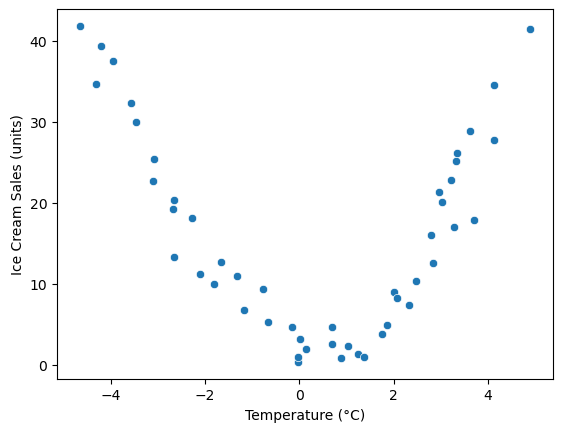

In [12]:
sns.scatterplot(data=data, x=X, y=y)

In [13]:
# Spliting data into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [14]:
# Reshape because we want 2D array
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
    X_test = X_test.to_frame()

In [15]:
# if isinstance(y_train, pd.Series):
#     y_train = y_train.to_frame()
#     y_test = y_test.to_frame()

In [16]:
poly_reg = PolynomialFeatures(degree=2)
# poly_reg.fit(X_train)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape

(39, 3)

In [17]:
X_train[:3]

,Temperature (°C)
23,0.149245
38,2.959932
43,3.335932


In [18]:
X_train_poly[:5]

array([[ 1.        ,  0.14924457,  0.02227394],
       [ 1.        ,  2.95993209,  8.76119799],
       [ 1.        ,  3.33593241, 11.12844506],
       [ 1.        ,  0.87490503,  0.76545881],
       [ 1.        , -1.66034773,  2.75675458]])

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [20]:
# Evaluate the model
accuracy = model.score(X_test_poly, y_test)
print(f"\nModel R^2 Score: {accuracy:.2f}")


Model R^2 Score: 0.94


In [21]:
# predicted values and mean squared error
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared error: {mse:.2f}")


 Mean Squared error: 12.96


In [22]:
mean_absolute_percentage_error(y_test, y_pred)* 100

64.73353670500653

In [23]:
X.values

array([-4.66226268, -4.31655945, -4.21398476, -3.94966109, -3.57855372,
       -3.4557117 , -3.10844012, -3.08130332, -2.67246083, -2.65228679,
       -2.65149803, -2.288264  , -2.11186969, -1.81893761, -1.66034773,
       -1.32637898, -1.17312327, -0.77333004, -0.6737528 , -0.14963487,
       -0.0361565 , -0.03389529,  0.0086077 ,  0.14924457,  0.68878091,
        0.69359887,  0.87490503,  1.02418081,  1.24071162,  1.35981267,
        1.74000001,  1.85055193,  1.99931037,  2.0751006 ,  2.31859124,
        2.471946  ,  2.78483646,  2.83176021,  2.95993209,  3.02087431,
        3.21136614,  3.27004407,  3.31607252,  3.33593241,  3.61077848,
        3.70405744,  4.13086796,  4.13353379,  4.89903151])

In [24]:
reshape_X = X.values.reshape(-1, 1)

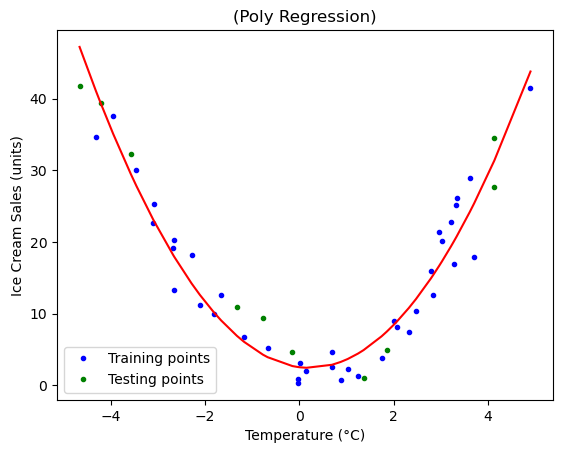

In [25]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X, model.predict(poly_reg.fit_transform(reshape_X)), color="red")
plt.title("(Poly Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

#  Apply Simple Linear Regression on same Data

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
Ly_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.10321470795210086

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


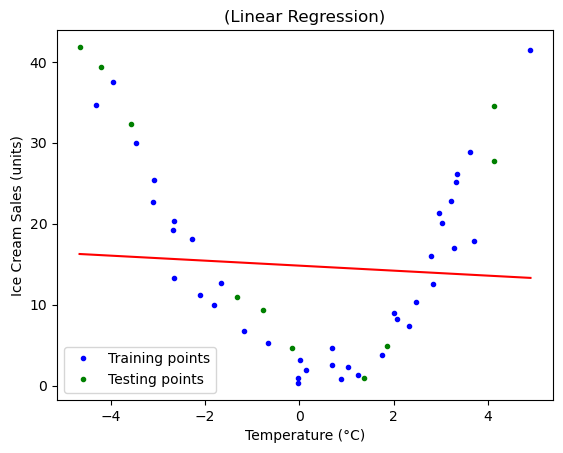

In [29]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X,model.predict(reshape_X), color="red")
plt.title("(Linear Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()

In [58]:
mean_absolute_percentage_error(y_test, Ly_pred)* 100

220.39575480481452